# Import and Upload

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# upload
uploaded = files.upload()

Saving highway_interurban_yearly_agg.csv to highway_interurban_yearly_agg.csv
Saving highway_yearly_agg.csv to highway_yearly_agg.csv


# Passage of Urban Highway - yearly

In [3]:
df_hw = pd.read_csv('highway_yearly_agg.csv')
df_hw.head()

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT
0,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2014,2014-12-31,9.905555e+07,0.074191
1,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2015,2015-12-31,1.073556e+08,0.081544
2,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2016,2016-12-31,1.147990e+08,0.099478
3,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2017,2017-12-31,1.208203e+08,0.099008
4,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2018,2018-12-31,1.234694e+08,0.096684


In [4]:
# check if there is missing value
is_na_present = df_hw.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [5]:
df_hw.dtypes

EXTRACTIONDATE          object
REG                    float64
Descripción series      object
YEAR                     int64
DATE                    object
INDEX                  float64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [6]:
# pick only passage and Default Likelihood
df_hw_corr = df_hw[['INDEX', 'LIKELIHOODOFDEFAULT']]
df_hw_corr.head()

,INDEX,LIKELIHOODOFDEFAULT
0,9.905555e+07,0.074191
1,1.073556e+08,0.081544
2,1.147990e+08,0.099478
3,1.208203e+08,0.099008
4,1.234694e+08,0.096684


Basic Visualization

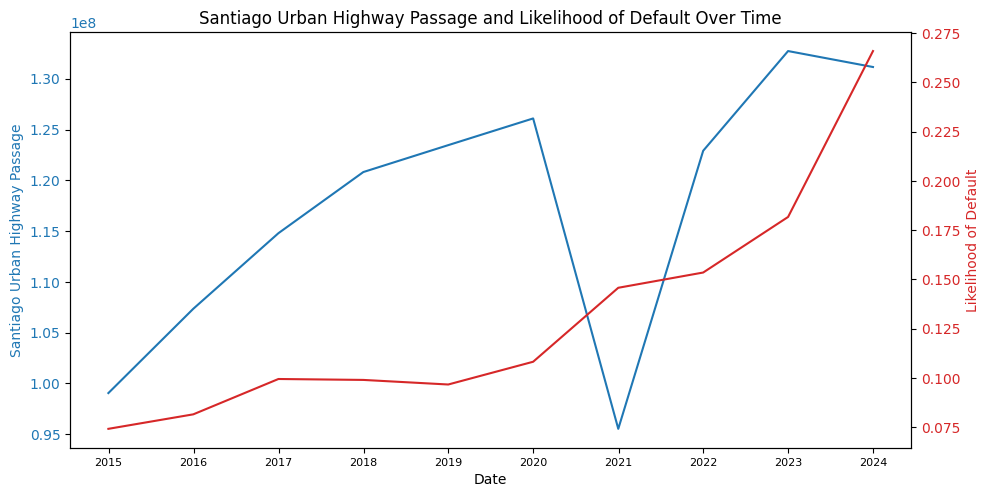

In [7]:
# Highway Passage and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_hw['DATE'] = pd.to_datetime(df_hw['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Santiago Urban Highway Passage', color=color)
ax1.plot(df_hw['DATE'], df_hw['INDEX'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_hw['DATE'], df_hw['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago Urban Highway Passage and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [8]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_hw_corr['INDEX'], df_hw_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_hw_corr['INDEX']
X = sm.add_constant(X)  # adding a constant to the model
y = df_hw_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
hw_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(hw_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.270
Model:                             OLS   Adj. R-squared:                  0.179
Method:                  Least Squares   F-statistic:                     2.965
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):              0.123
Time:                         23:58:10   Log-Likelihood:                 16.290
No. Observations:                   10   AIC:                            -28.58
Df Residuals:                        8   BIC:                            -27.97
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1462      0.162     -0.90

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(hw_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {hw_model.params[0]:.3f}")
print(f"Slope (Santiago Urban Highway Passage): {hw_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {hw_model.pvalues[0]:.3f}")
print(f"P-value (Santiago Urban Highway Passage): {hw_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {hw_model.bse[0]:.3f}")
print(f"Standard Error (Santiago Urban Highway Passage): {hw_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.5199756428047665
Model R-squared: 0.270

Model Coefficients:
Intercept: -0.146
Slope (Santiago Urban Highway Passage): 0.000

Model P-values:
P-value (Intercept): 0.392
P-value (Santiago Urban Highway Passage): 0.123

Model Standard Errors:
Standard Error (Intercept): 0.162
Standard Error (Santiago Urban Highway Passage): 0.000


Regression Visualization

In [10]:
sns.set_style("whitegrid")

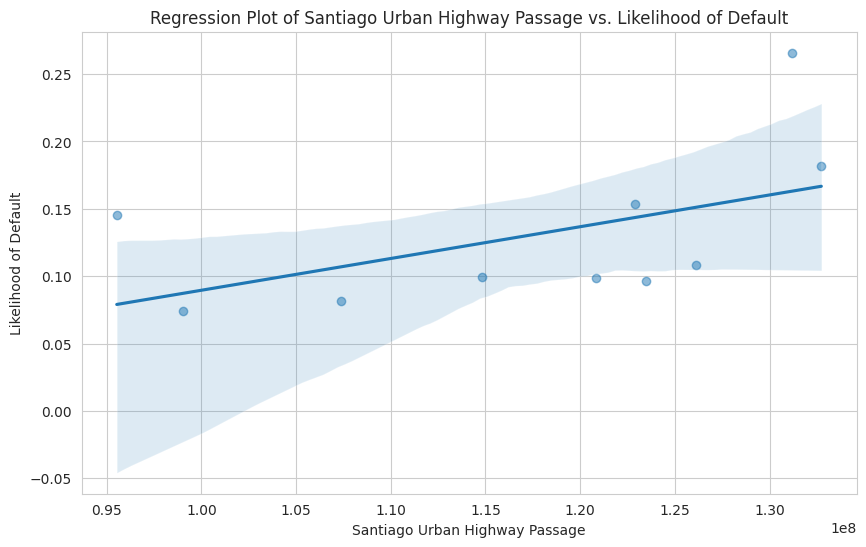

In [11]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='INDEX', y='LIKELIHOODOFDEFAULT', data=df_hw_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Santiago Urban Highway Passage vs. Likelihood of Default')
plt.xlabel('Santiago Urban Highway Passage')
plt.ylabel('Likelihood of Default')
plt.show()

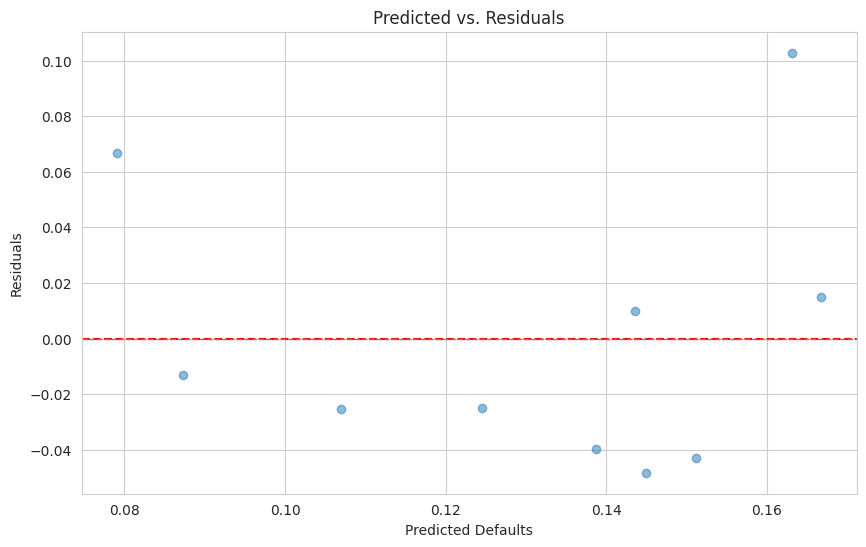

In [12]:
# Residual Plot
residuals = hw_model.resid
predicted = hw_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 2000x600 with 0 Axes>

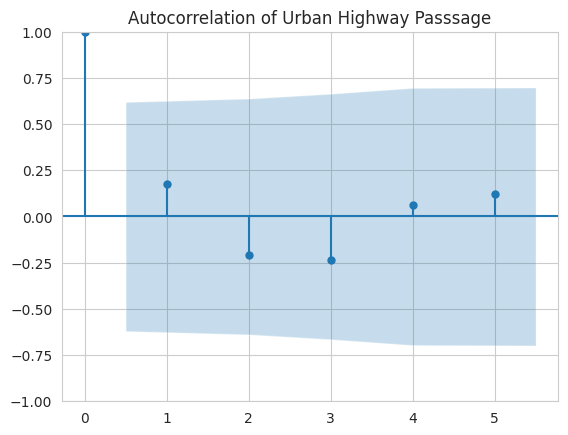

<Figure size 2000x600 with 0 Axes>

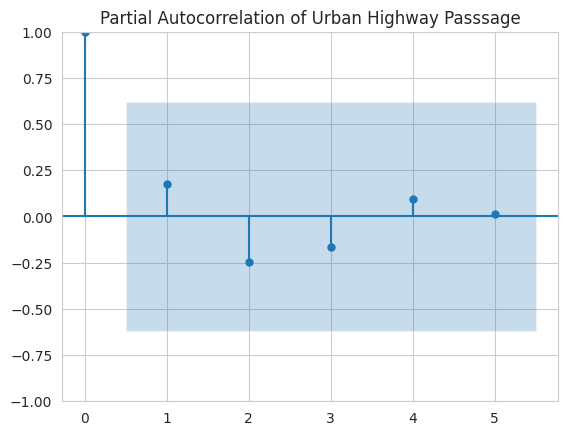

In [13]:
# Autocorrelation and Partial Autocorrelation
df_hw.set_index('DATE', inplace=True)

# Autocorrelation Plot for Urban Highway Passsage
plt.figure(figsize=(20, 6))
plot_acf(df_hw['INDEX'], lags=5)
plt.title('Autocorrelation of Urban Highway Passsage')
plt.show()

# Partial Autocorrelation Plot for Urban Highway Passsage
plt.figure(figsize=(20, 6))
plot_pacf(df_hw['INDEX'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Urban Highway Passsage')
plt.show()

<Figure size 2000x600 with 0 Axes>

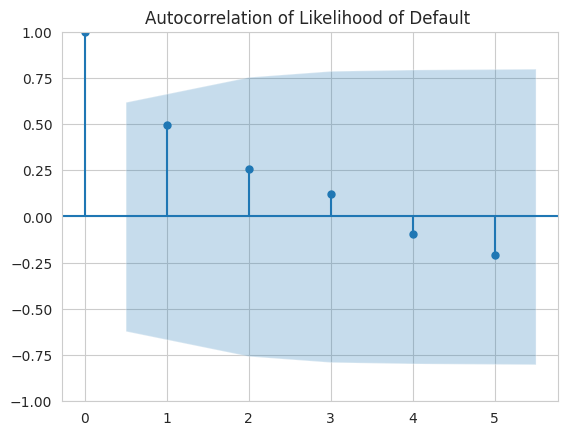

<Figure size 2000x600 with 0 Axes>

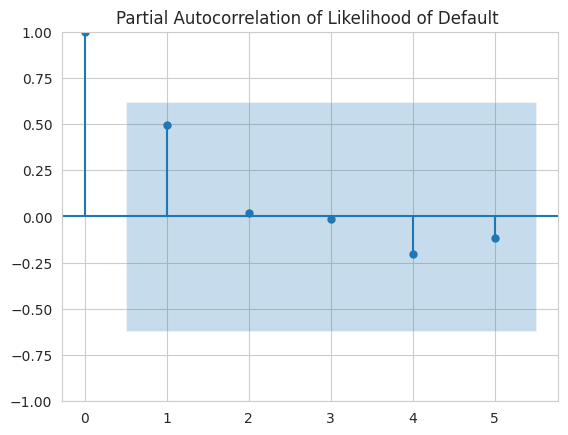

In [14]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_acf(df_hw['LIKELIHOODOFDEFAULT'], lags=5)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_pacf(df_hw['LIKELIHOODOFDEFAULT'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()

# Passage of Interurban Toll - yearly

In [15]:
df_inter = pd.read_csv('highway_interurban_yearly_agg.csv')
df_inter.head()

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT
0,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2014,2014-12-31,9.557303e+06,0.074191
1,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2015,2015-12-31,1.048325e+07,0.081544
2,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2016,2016-12-31,1.182673e+07,0.099478
3,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2017,2017-12-31,1.352149e+07,0.099008
4,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2018,2018-12-31,1.735575e+07,0.096684


In [16]:
# check if there is missing value
is_na_present = df_inter.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [17]:
df_inter.dtypes

EXTRACTIONDATE          object
REG                    float64
Descripción series      object
YEAR                     int64
DATE                    object
INDEX                  float64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [18]:
# pick only passage and Default Likelihood
df_inter_corr = df_inter[['INDEX', 'LIKELIHOODOFDEFAULT']]
df_inter_corr.head()

,INDEX,LIKELIHOODOFDEFAULT
0,9.557303e+06,0.074191
1,1.048325e+07,0.081544
2,1.182673e+07,0.099478
3,1.352149e+07,0.099008
4,1.735575e+07,0.096684


Basic Visualization

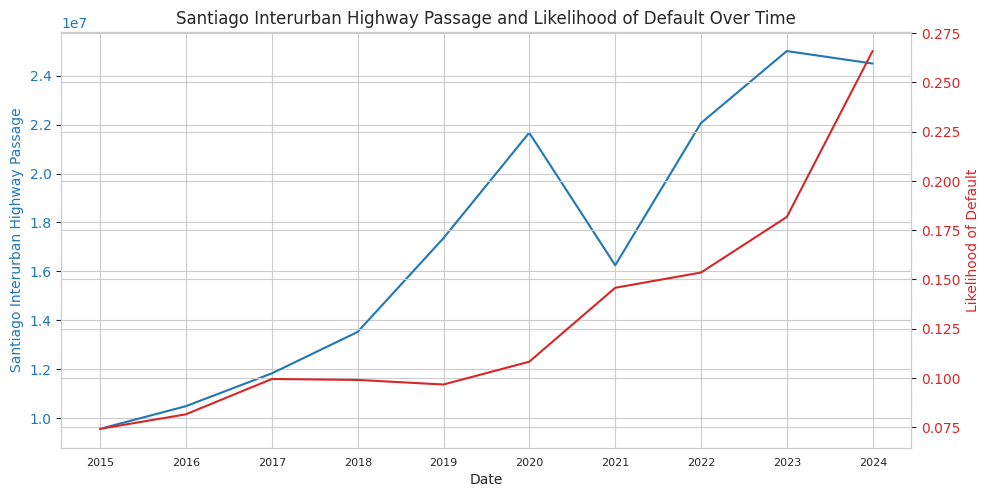

In [19]:
# Highway Passage and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Santiago Interurban Highway Passage', color=color)
ax1.plot(df_inter['DATE'], df_inter['INDEX'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_inter['DATE'], df_inter['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago Interurban Highway Passage and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [20]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_inter_corr['INDEX'], df_inter_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_inter_corr['INDEX']
X = sm.add_constant(X)  # adding a constant to the model
y = df_inter_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
inter_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(inter_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.624
Model:                             OLS   Adj. R-squared:                  0.577
Method:                  Least Squares   F-statistic:                     13.25
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):            0.00658
Time:                         23:58:14   Log-Likelihood:                 19.599
No. Observations:                   10   AIC:                            -35.20
Df Residuals:                        8   BIC:                            -34.59
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.039     -0.15

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(inter_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {inter_model.params[0]:.3f}")
print(f"Slope (Santiago Interurban Highway Passage): {inter_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {inter_model.pvalues[0]:.3f}")
print(f"P-value (Santiago Interurban Highway Passage): {inter_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {inter_model.bse[0]:.3f}")
print(f"Standard Error (Santiago Interurban Highway Passage): {inter_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.789692502244725
Model R-squared: 0.624

Model Coefficients:
Intercept: -0.006
Slope (Santiago Interurban Highway Passage): 0.000

Model P-values:
P-value (Intercept): 0.878
P-value (Santiago Interurban Highway Passage): 0.007

Model Standard Errors:
Standard Error (Intercept): 0.039
Standard Error (Santiago Interurban Highway Passage): 0.000


Regression Visualization

In [22]:
sns.set_style("whitegrid")

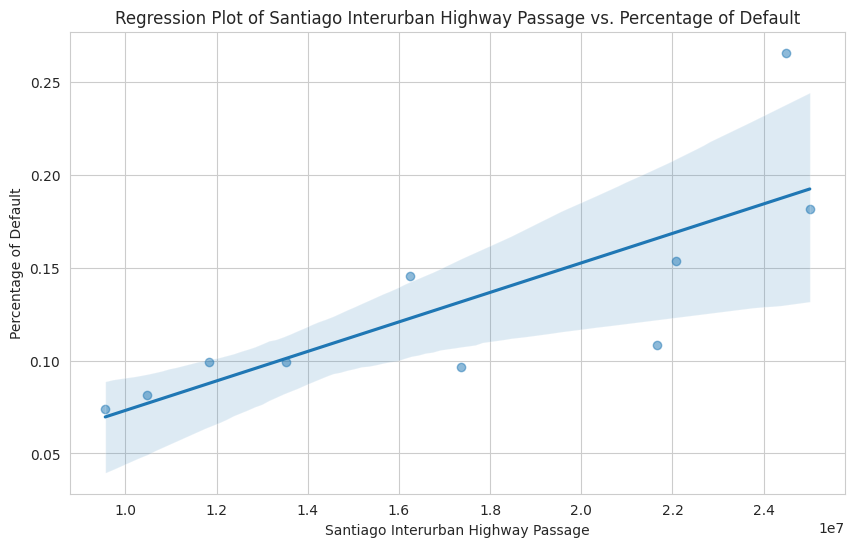

In [23]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='INDEX', y='LIKELIHOODOFDEFAULT', data=df_inter_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Santiago Interurban Highway Passage vs. Percentage of Default')
plt.xlabel('Santiago Interurban Highway Passage')
plt.ylabel('Percentage of Default')
plt.show()

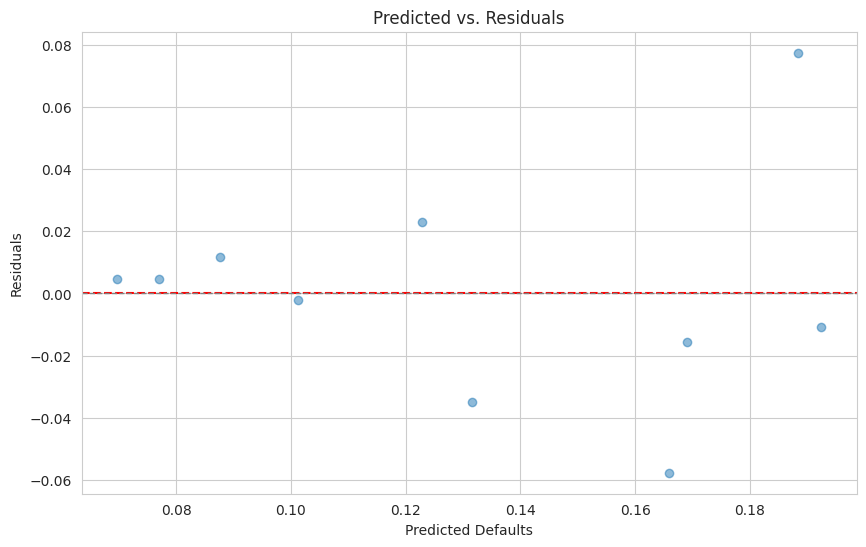

In [24]:
# Residual Plot
residuals = inter_model.resid
predicted = inter_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 2000x600 with 0 Axes>

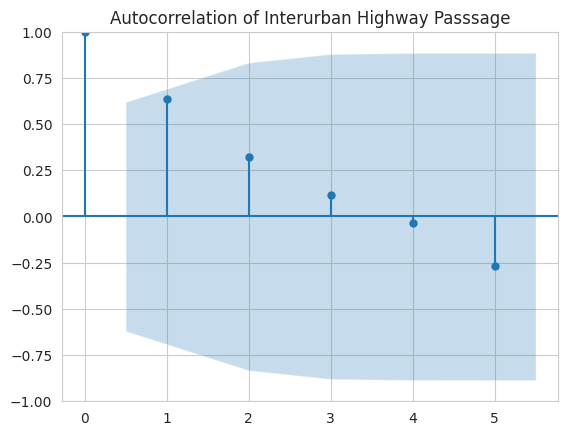

<Figure size 2000x600 with 0 Axes>

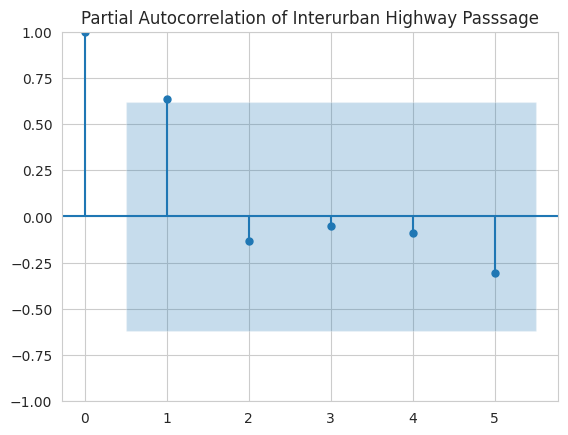

In [25]:
# Autocorrelation and Partial Autocorrelation
df_inter.set_index('DATE', inplace=True)

# Autocorrelation Plot for Interurban Highway Passsage
plt.figure(figsize=(20, 6))
plot_acf(df_inter['INDEX'], lags=5)
plt.title('Autocorrelation of Interurban Highway Passsage')
plt.show()

# Partial Autocorrelation Plot for Interurban Highway Passsage
plt.figure(figsize=(20, 6))
plot_pacf(df_inter['INDEX'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Interurban Highway Passsage')
plt.show()

<Figure size 2000x600 with 0 Axes>

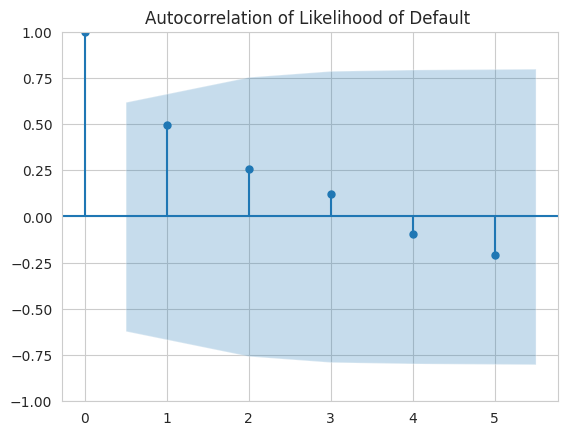

<Figure size 2000x600 with 0 Axes>

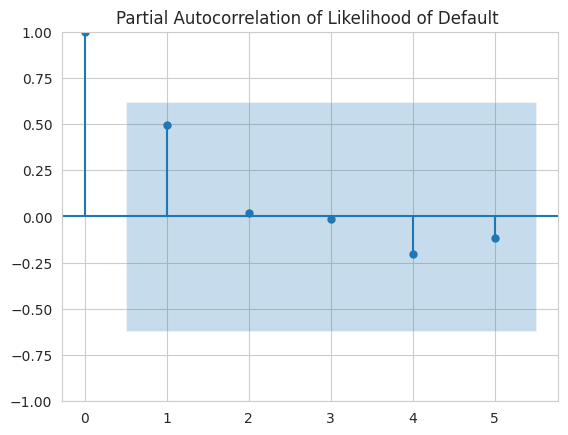

In [26]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_acf(df_inter['LIKELIHOODOFDEFAULT'], lags=5)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_pacf(df_inter['LIKELIHOODOFDEFAULT'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()